In [1]:
#source: https://www.kaggle.com/shashanksai/text-preprocessing-using-python

In [2]:
!pip3 install re

Exception:
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/pip/basecommand.py", line 215, in main
    status = self.run(options, args)
  File "/usr/lib/python3/dist-packages/pip/commands/install.py", line 353, in run
    wb.build(autobuilding=True)
  File "/usr/lib/python3/dist-packages/pip/wheel.py", line 749, in build
    self.requirement_set.prepare_files(self.finder)
  File "/usr/lib/python3/dist-packages/pip/req/req_set.py", line 380, in prepare_files
    ignore_dependencies=self.ignore_dependencies))
  File "/usr/lib/python3/dist-packages/pip/req/req_set.py", line 554, in _prepare_file
    require_hashes
  File "/usr/lib/python3/dist-packages/pip/req/req_install.py", line 278, in populate_link
    self.link = finder.find_requirement(self, upgrade)
  File "/usr/lib/python3/dist-packages/pip/index.py", line 465, in find_requirement
    all_candidates = self.find_all_candidates(req.name)
  File "/usr/lib/python3/dist-packages/pip/index.py", line 423, in fin

In [3]:
!pip3 install pandas


  Using cached https://files.pythonhosted.org/packages/8e/86/c14387d6813ebadb7bf61b9ad270ffff111c8b587e4d266e07de774e385e/pandas-1.0.4-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/4f/a4/879454d49688e2fad93e59d7d4efda580b783c745fd2ec2a3adf87b0808d/pytz-2020.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/03/27/e35e7c6e6a52fab9fcc64fc2b20c6b516eba930bb02b10ace3b38200d3ab/numpy-1.18.4-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/ee/ff/48bde5c0f013094d729fe4b0316ba2a24774b3ff1c52d924a8a4cb04078a/six-1.15.0-py2.py3-none-any.whl


In [6]:
import pandas as pd

In [ ]:
!pip3 install seaborn

    100% |████████████████████████████████| 225kB 832kB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/dc/29/162476fd44203116e7980cfbd9352eef9db37c49445d1fec35509022f6aa/scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl
    100% |████████████████████████████████| 12.4MB 90kB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/8e/86/c14387d6813ebadb7bf61b9ad270ffff111c8b587e4d266e07de774e385e/pandas-1.0.4-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/03/27/e35e7c6e6a52fab9fcc64fc2b20c6b516eba930bb02b10ace3b38200d3ab/numpy-1.18.4-cp36-cp36m-manylinux1_x86_64.whl
    100% |████████████████████████████████| 71kB 3.3MB/s ta 0:00:011
    100% |████████████████████████████████| 92kB 1.8MB/s ta 0:00:011
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/

In [2]:
import seaborn as sns

In [2]:
from nltk.corpus import stopwords

Diffrent types of   stemmers :

https://stackoverflow.com/questions/10554052/what-are-the-major-differences-and-benefits-of-porter-and-lancaster-stemming-alg

Stemming and lemmatization: 
https://stackoverflow.com/questions/1787110/what-is-the-difference-between-lemmatization-vs-stemming

In [3]:
import nltk                                                                         #Stopwords corpus
from nltk.stem import PorterStemmer                                               # Porter Stemmer
from nltk.stem import SnowballStemmer                                              # Portor 2.0 
from sklearn.feature_extraction.text import CountVectorizer                       #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer                       #For TF-IDF
from gensim.models import Word2Vec                                               #For Word2Vec

In [8]:
df = pd.read_csv('/home/shiv/Dataset/Reviews.csv')

In [5]:
#df.head()

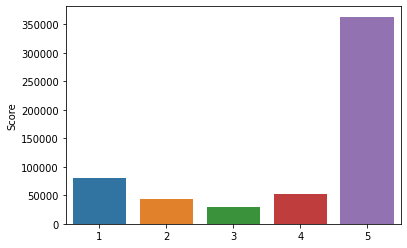

In [11]:
sns.barplot(data = df, y = df.Score.value_counts(), x = df.Score.unique())

In [9]:
df_score_removed = df[df['Score']!=3]       #Neutral reviews removed


In [10]:
def partition(x):
    if x < 3:
        return 'positive'
    return 'negative'

score_upd = df_score_removed['Score']
t = score_upd.map(partition)
df_score_removed['Score']=t

/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
final_data = df_score_removed.drop_duplicates(subset={"UserId","ProfileName","Time","Text"})

In [12]:
final = final_data[final_data['HelpfulnessNumerator'] <= final_data['HelpfulnessDenominator']]

In [13]:
final_X = final['Text']  
final_y = final['Score']

Stemming- Converting the words into their base word or stem word ( Ex - tastefully, tasty, these words are converted to stem word called 'tasti'). This reduces the vector dimension because we dont consider all similar words

Stopwords - Stopwords are the unnecessary words that even if they are removed the sentiment of the sentence dosent change.

Ex - This pasta is so tasty ==> pasta tasty ( This , is, so are stopwords so they are removed)

In [14]:
stop = set(stopwords.words('english')) 
print(stop)

{'about', "you'd", 'other', 'each', 'i', 'these', 'because', 'same', 'so', 'isn', 'further', 'didn', 'ain', "mightn't", 'such', 'has', 'you', 'there', 'with', 'out', 've', "needn't", 'where', 'any', 'your', 'up', 'that', 'our', 'its', "doesn't", 'over', 'here', 'during', 'which', 'all', 't', 'down', 'theirs', 'more', 'this', 'into', 'yourself', "you'll", 'from', 'both', 'was', 'wouldn', "aren't", "should've", 'ours', 'having', 'under', 'after', 'while', 'to', 'should', 'is', 'hasn', 'at', 'or', 'mightn', 'against', 'the', 'me', 'shouldn', 'what', 'had', 'as', 'doesn', "that'll", "hadn't", 'in', 'when', 'he', 'hers', 'an', 'will', 'who', 'aren', 'don', 'until', 'hadn', 'than', 'shan', 'her', 'of', 'now', 'do', 'does', 'herself', 'before', 'some', 'between', "mustn't", 'no', "weren't", 'own', 'my', "shouldn't", 'and', 'mustn', 'again', 'been', "she's", 'too', 'not', 'themselves', 'how', 'on', 'few', 'being', 'm', 're', 's', 'very', 'll', 'am', "didn't", 'were', 'him', "don't", "wouldn't"

In [15]:

for sentence in final_X:
    sentence = sentence.lower()                 # Converting to lowercase
    cleanr = re.compile('<.*?>')
    sentence = re.sub(cleanr, ' ', sentence)        #Removing HTML tags
    sentence = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    sentence = re.sub(r'[.|,|)|(|\|/]',r' ',sentence)        #Removing Punctuations
    
    words = [snow.stem(word) for word in sentence.split() if word not in stopwords.words('english')]   # Stemming and removing stopwords
    temp.append(words)
    
final_X = temp    

NameError: name 're' is not defined

#Snowball stemmer (Porter 2.0)
#https://www.nltk.org/_modules/nltk/stem/snowball.html

snow = nltk.stem.SnowballStemmer('english')
print(" ".join(SnowballStemmer.languages)) # See which languages are supported



stemmer = SnowballStemmer("german") # Choose a language
stemmer.stem("Autobahnen") # Stem a word

In [16]:
#replacing commas with whitespace
sent = []
for row in final_X:
    sequ = ''
    for word in row:
        sequ = sequ + ' ' + word
    sent.append(sequ)

final_X = sent
print(final_X[1])

 P r o d u c t   a r r i v e d   l a b e l e d   a s   J u m b o   S a l t e d   P e a n u t s . . . t h e   p e a n u t s   w e r e   a c t u a l l y   s m a l l   s i z e d   u n s a l t e d .   N o t   s u r e   i f   t h i s   w a s   a n   e r r o r   o r   i f   t h e   v e n d o r   i n t e n d e d   t o   r e p r e s e n t   t h e   p r o d u c t   a s   " J u m b o " .


Drawbacks of BoW/ Binary BoW

Our main objective in doing these text to vector encodings is that similar meaning text vectors should be close to each other, but in some cases this may not possible for Bow

For example, if we consider two reviews This pasta is very tasty and This pasta is not tasty after stopwords removal both sentences will be converted to pasta tasty so both giving exact same meaning.

The main problem is here we are not considering the front and back words related to every word, here comes Bigram and Ngram techniques.

BI-GRAM BOW

Considering pair of words for creating dictionary is Bi-Gram , Tri-Gram means three consecutive words so as NGram.

CountVectorizer has a parameter ngram_range if assigned to (1,2) it considers Bi-Gram BoW

But this massively increases our dictionary size

In [17]:
final_B_X = final_X

#how CounVectorizer works 
#Source: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html


from sklearn.feature_extraction.text import CountVectorizer
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.', 
     'Is this the first document?',
         ]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
#output 
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
print(X.toarray())
'''
#output 

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]
'''

vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X2 = vectorizer2.fit_transform(corpus)
print(vectorizer2.get_feature_names())
#output  
'''
['and this', 'document is', 'first document', 'is the', 'is this', 'second document', 'the first', 'the second', 'the third', 'third one', 'this document', 'this is', 'this the']
'''
print(X2.toarray())

#output 
'''
[[0 0 1 1 0 0 1 0 0 0 0 1 0]
 [0 1 0 1 0 1 0 1 0 0 1 0 0]
 [1 0 0 1 0 0 0 0 1 1 0 1 0]
 [0 0 1 0 1 0 1 0 0 0 0 0 1]]
'''

In [19]:
count_vect = CountVectorizer(ngram_range=(1,2))
Bigram_data = count_vect.fit_transform(final_B_X)
print(Bigram_data[1])
print(Bigram_data[0,2512439])

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [20]:
print(Bigram_data[0,2512439])

NameError: name 'Bigram_data' is not defined

TF-IDF

Term Frequency - Inverse Document Frequency it makes sure that less importance is given to most frequent words and also considers less frequent words.

Term Frequency is number of times a particular word(W) occurs in a review divided by totall number of words (Wr) in review. The term frequency value ranges from 0 to 1.

Inverse Document Frequency is calculated as log(Total Number of Docs(N) / Number of Docs which contains particular word(n)). Here Docs referred as Reviews.

TF-IDF is TF * IDF that is (W/Wr)*LOG(N/n)

Using scikit-learn's tfidfVectorizer we can get the TF-IDF.

So even here we get a TF-IDF value for every word and in some cases it may consider different meaning reviews as similar after stopwords removal. so to over come we can use BI-Gram or NGram.

In [21]:
final_tf = final_X
tf_idf = TfidfVectorizer(max_features=5000)
tf_data = tf_idf.fit_transform(final_tf)
print(tf_data[1])

ValueError: empty vocabulary; perhaps the documents only contain stop words